In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sales-in-europe/Sales.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
sales = pd.read_csv('/kaggle/input/bike-sales-in-europe/Sales.csv', parse_dates = ['Date'])

In [4]:
sales.shape

(113036, 18)

In [5]:
sales.dtypes
# sales.info()

Date                datetime64[ns]
Day                          int64
Month                       object
Year                         int64
Customer_Age                 int64
Age_Group                   object
Customer_Gender             object
Country                     object
State                       object
Product_Category            object
Sub_Category                object
Product                     object
Order_Quantity               int64
Unit_Cost                    int64
Unit_Price                   int64
Profit                       int64
Cost                         int64
Revenue                      int64
dtype: object

The **"parse_dates"** argument specifies that the **"Date"** column should be parsed as a date and not as a string. The data from the file will be loaded into a Pandas DataFrame named **"sales"**.

In [6]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


**pandas.DataFrame.head(n = 5)** -- This function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it.

For negative values of n, this function returns all rows except the last |n| rows, equivalent to df[:n]

In [7]:
sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


Notice that non-numeric columns are dropped from the statistical summary provided by df.describe().

We can get a summary of the categorical variables by passing only those columns to describe():

In [8]:
categorical = sales.dtypes[sales.dtypes == 'object']
print(categorical)

Month               object
Age_Group           object
Customer_Gender     object
Country             object
State               object
Product_Category    object
Sub_Category        object
Product             object
dtype: object


In [9]:
categorical = sales.dtypes[sales.dtypes == "object"].index
print(categorical)
      
sales[categorical].describe()

Index(['Month', 'Age_Group', 'Customer_Gender', 'Country', 'State',
       'Product_Category', 'Sub_Category', 'Product'],
      dtype='object')


,Month,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product
count,113036,113036,113036,113036,113036,113036,113036,113036
unique,12,4,2,6,53,3,17,130
top,June,Adults (35-64),M,United States,California,Accessories,Tires and Tubes,Water Bottle - 30 oz.
freq,11234,55824,58312,39206,22450,70120,33870,10794


This code snippet is checking for columns with data type "object" in a Pandas DataFrame called "sales". The .dtypes property returns a series containing data types of each column in the DataFrame. The comparison sales.dtypes == "object" returns a boolean array indicating whether each data type in the series is "object". The .index property returns the index (column labels) of the resulting boolean array. Finally, the categorical variable is assigned the index of the columns with data type "object".

The categorical variable summary shows the count of non-NaN records, the number of unique categories, the most frequently occurring value and the number of occurrences of the most frequent value.

After looking at the data for the first time, you should ask yourself a few questions:

1. Do I need all of the variables?
2. Should I transform any variables?
3. Are there NA values, outliers or other strange values?
4. Should I create new variables?

# Customer Age 

In [10]:
sales['Customer_Age'].mean()

35.91921157861212

<AxesSubplot:ylabel='Density'>

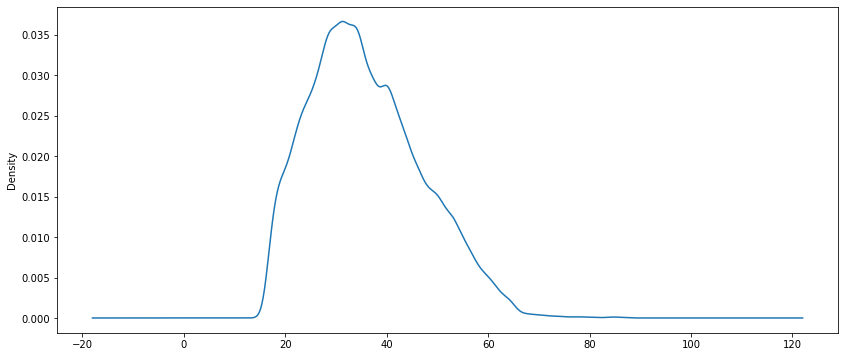

In [11]:
sales['Customer_Age'].plot(kind = 'kde', figsize = (14, 6) )

**DataFrame.plot.kde (Kernel Distribution Estimation Plot)** -- Kdeplot depicts the probability density function of the continuous or non-parametric data variables i.e. we can plot for the univariate or multiple variables altogether.

<AxesSubplot:>

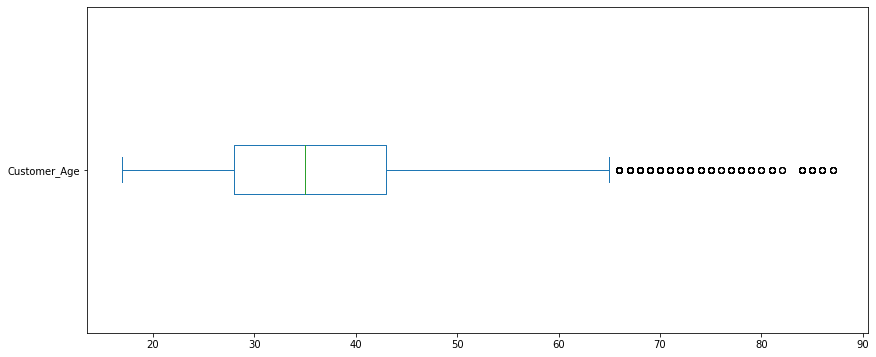

In [12]:
sales['Customer_Age'].plot(kind='box', vert=False, figsize=(14,6))

A **boxplot** is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”).
![Different parts of boxplot](https://www.linkpicture.com/q/resim_2023-02-07_162314778.png)

Boxplots can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped and if and how your data is skewed.

# Order Quantity

In [13]:
sales['Order_Quantity'].mean()

11.901659648253654

In [14]:
sales['Order_Quantity'].min()

1

In [15]:
sales['Order_Quantity'].max()

32

<AxesSubplot:>

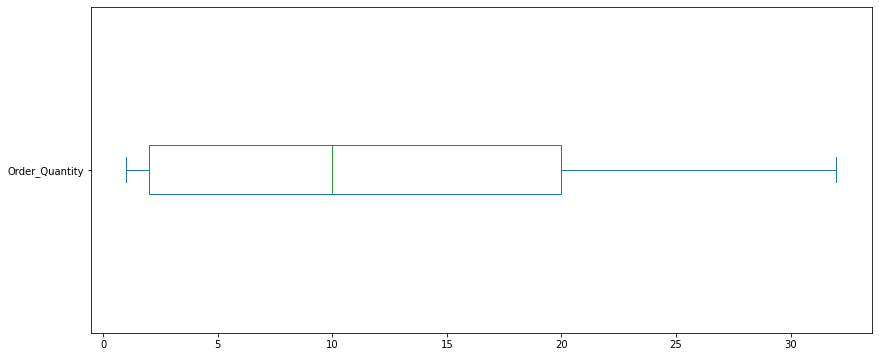

In [16]:
sales['Order_Quantity'].plot(kind = 'box', vert = False, figsize = (14, 6))

<AxesSubplot:ylabel='Frequency'>

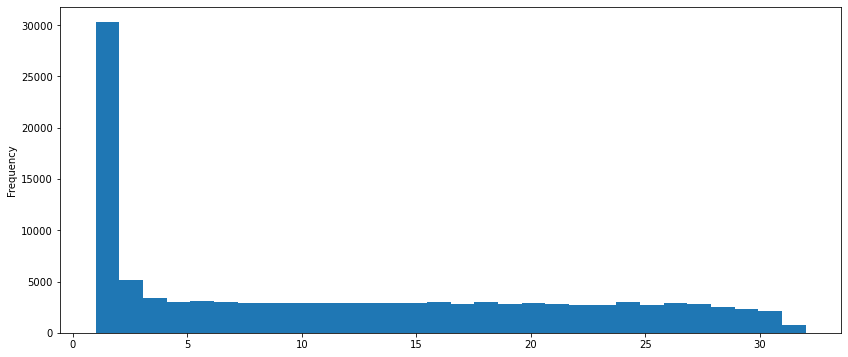

In [17]:
sales['Order_Quantity'].plot(kind = 'hist', bins = 30, figsize = (14, 6))

**pandas.DataFrame.hist** -- A histogram is a representation of the distribution of data. This function calls **matplotlib.pyplot.hist()**, on each series in the DataFrame, resulting in one histogram per column.

# Unit_Cost

In [18]:
sales['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [19]:
sales['Unit_Cost'].mean()

267.296365759581

In [20]:
sales['Unit_Cost'].median()

9.0

<AxesSubplot:>

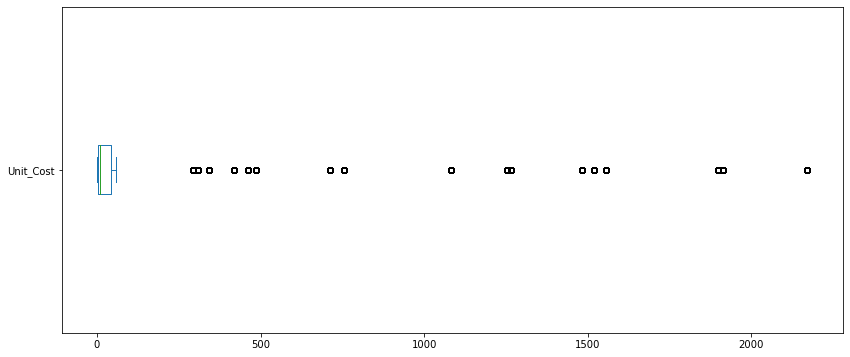

In [21]:
sales['Unit_Cost'].plot(kind = 'box', vert = False,  figsize = (14, 6))

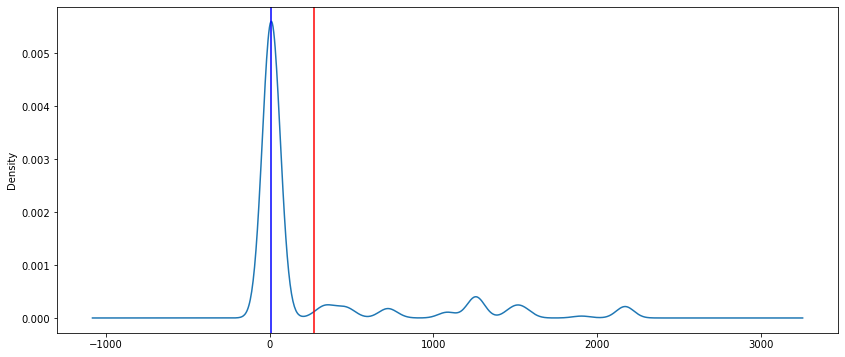

In [22]:
ax = sales['Unit_Cost'].plot(kind = 'density', figsize = (14, 6))
ax.axvline(sales['Unit_Cost'].mean(), color = 'red')
ax.axvline(sales['Unit_Cost'].median(), color = 'blue')

Text(0, 0.5, 'Number of Sales')

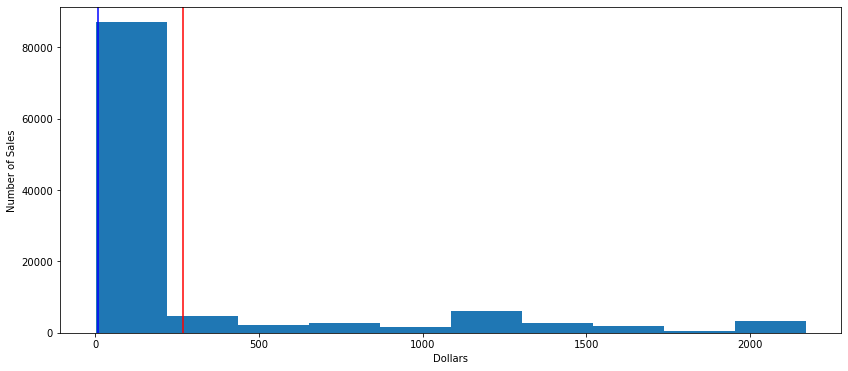

In [23]:
ax = sales['Unit_Cost'].plot(kind = 'hist', figsize = (14, 6))
ax.axvline(sales['Unit_Cost'].mean(), color = 'red')
ax.axvline(sales['Unit_Cost'].median(), color = 'blue')
ax.set_xlabel('Dollars')
ax.set_ylabel('Number of Sales')

## Categorical Analysis and Visualization

### Realitionship Between Columns

In [24]:
corr = sales.corr()
corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


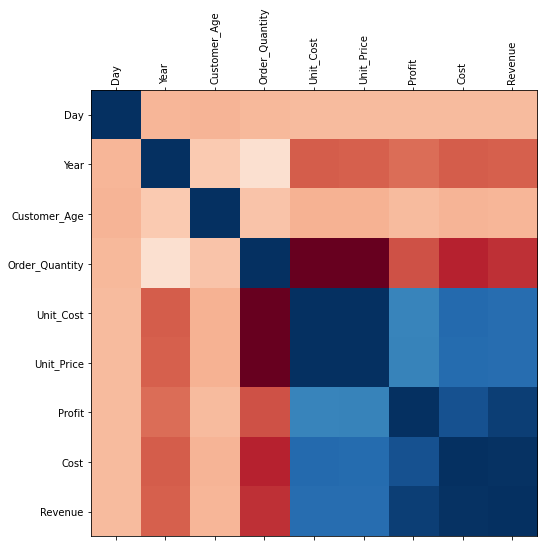

In [25]:
fig = plt.figure(figsize = (8, 8))
plt.matshow(corr, cmap = 'RdBu', fignum = fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation = 'vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

<AxesSubplot:xlabel='Customer_Age', ylabel='Revenue'>

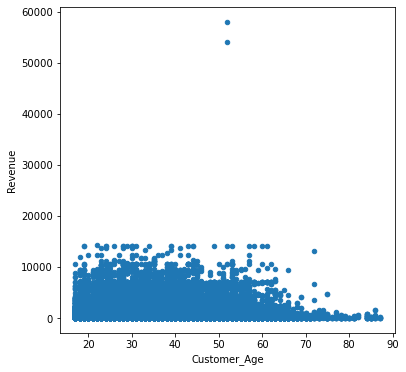

In [26]:
sales.plot(kind = 'scatter', x = 'Customer_Age', y = 'Revenue', figsize = (6, 6))

<AxesSubplot:xlabel='Revenue', ylabel='Profit'>

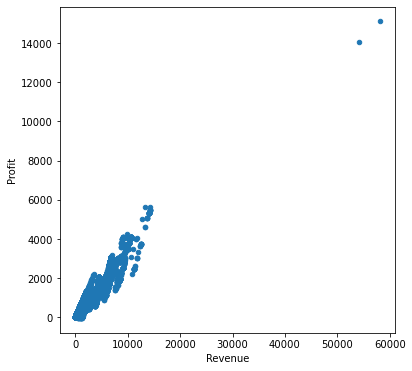

In [27]:
sales.plot(kind = 'scatter', x = 'Revenue', y = 'Profit', figsize = (6, 6))

Text(0, 0.5, 'Profit')

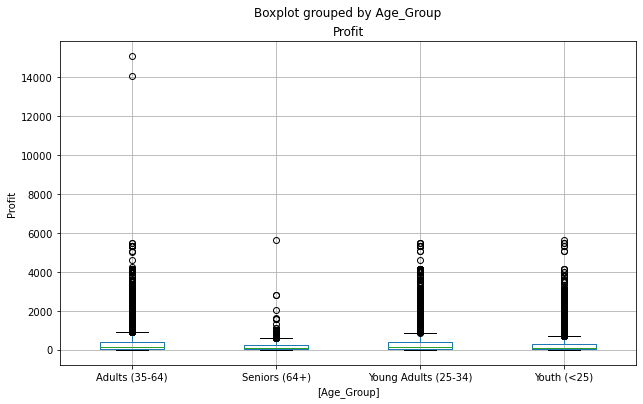

In [28]:
ax = sales[['Profit', 'Age_Group']].boxplot(by = 'Age_Group', figsize = (10, 6))
ax.set_ylabel('Profit')

Year                 AxesSubplot(0.125,0.536818;0.227941x0.343182)
Customer_Age      AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Order_Quantity    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Unit_Cost               AxesSubplot(0.125,0.125;0.227941x0.343182)
Unit_Price           AxesSubplot(0.398529,0.125;0.227941x0.343182)
Profit               AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

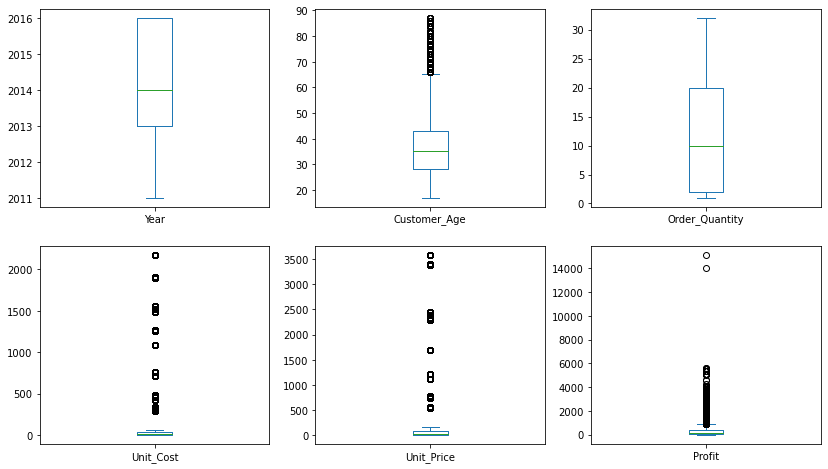

In [29]:
boxplot_cols = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']
sales[boxplot_cols].plot(kind = 'box', subplots = True, layout = (2, 3), figsize = (14, 8))

In [30]:
sales['Year'].value_counts()

2014    29398
2016    29398
2013    24443
2015    24443
2012     2677
2011     2677
Name: Year, dtype: int64

<AxesSubplot:ylabel='Year'>

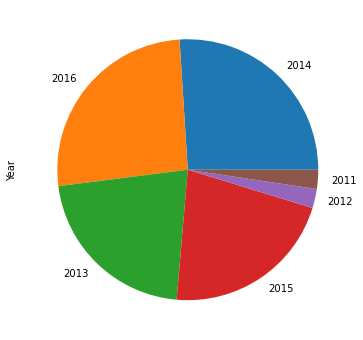

In [31]:
sales['Year'].value_counts().plot(kind = 'pie', figsize = (6, 6))

In [32]:
sales['Month'].value_counts()

June         11234
December     11200
May          11128
April        10182
March         9674
January       9284
February      9022
October       8750
November      8734
August        8200
September     8166
July          7462
Name: Month, dtype: int64

<AxesSubplot:>

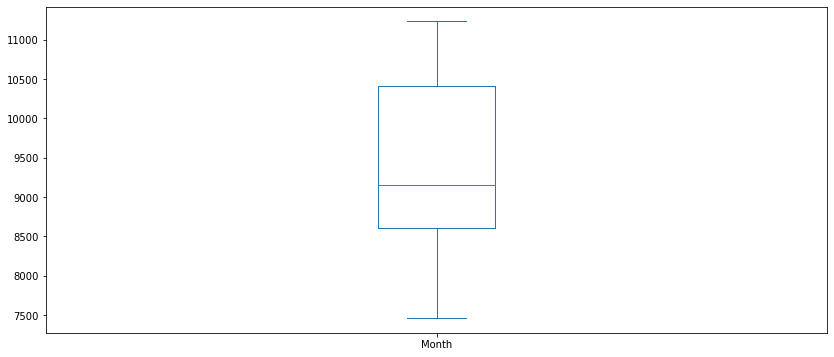

In [33]:
sales['Month'].value_counts().plot(kind = 'box', figsize = (14, 6))

In [34]:
sales['Country'].value_counts().head(1)

United States    39206
Name: Country, dtype: int64

In [35]:
sales['Country'].value_counts()

United States     39206
Australia         23936
Canada            14178
United Kingdom    13620
Germany           11098
France            10998
Name: Country, dtype: int64

<AxesSubplot:>

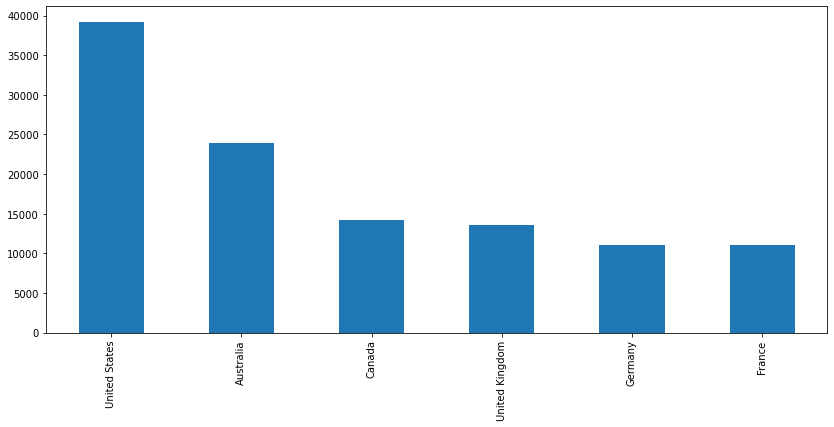

In [36]:
sales['Country'].value_counts().plot(kind='bar', figsize=(14,6))

In [37]:
sales['Product'].unique()

array(['Hitch Rack - 4-Bike', 'All-Purpose Bike Stand',
       'Mountain Bottle Cage', 'Water Bottle - 30 oz.',
       'Road Bottle Cage', 'AWC Logo Cap', 'Bike Wash - Dissolver',
       'Fender Set - Mountain', 'Half-Finger Gloves, L',
       'Half-Finger Gloves, M', 'Half-Finger Gloves, S',
       'Sport-100 Helmet, Black', 'Sport-100 Helmet, Red',
       'Sport-100 Helmet, Blue', 'Hydration Pack - 70 oz.',
       'Short-Sleeve Classic Jersey, XL',
       'Short-Sleeve Classic Jersey, L', 'Short-Sleeve Classic Jersey, M',
       'Short-Sleeve Classic Jersey, S', 'Long-Sleeve Logo Jersey, M',
       'Long-Sleeve Logo Jersey, XL', 'Long-Sleeve Logo Jersey, L',
       'Long-Sleeve Logo Jersey, S', 'Mountain-100 Silver, 38',
       'Mountain-100 Silver, 44', 'Mountain-100 Black, 48',
       'Mountain-100 Silver, 48', 'Mountain-100 Black, 38',
       'Mountain-200 Silver, 38', 'Mountain-100 Black, 44',
       'Mountain-100 Silver, 42', 'Mountain-200 Black, 46',
       'Mountain-200 Silver

<AxesSubplot:>

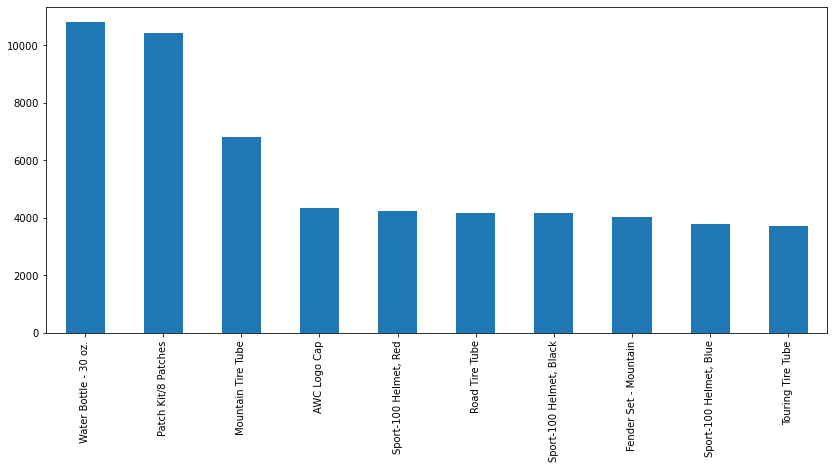

In [38]:
sales['Product'].value_counts().head(10).plot(kind='bar', figsize=(14,6))

<AxesSubplot:xlabel='Order_Quantity', ylabel='Unit_Price'>

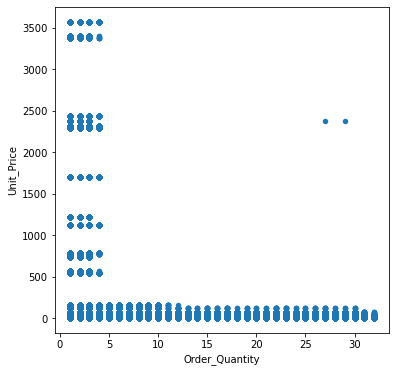

In [39]:
sales.plot(kind = 'scatter', x = 'Order_Quantity', y = 'Unit_Price', figsize = (6, 6) )

## Column Wrangling

We can crate new columns or modify existing ones.

### Revenue per Age

In [40]:
sales['Revenue_per_Age'] = sales['Revenue'] / sales['Customer_Age']
sales['Revenue_per_Age'].head()

0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Revenue_per_Age, dtype: float64

<AxesSubplot:ylabel='Density'>

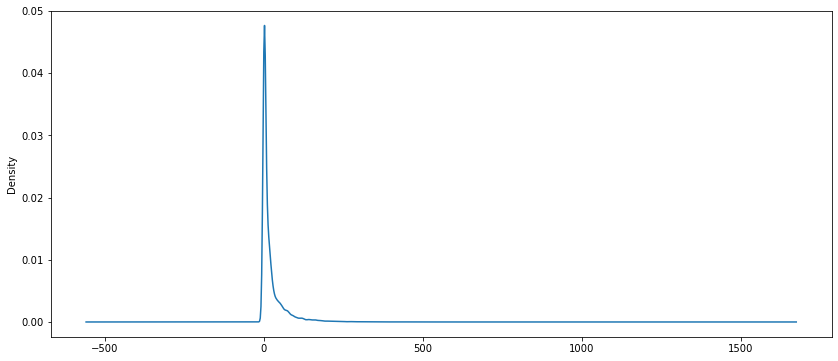

In [41]:
sales['Revenue_per_Age'].plot(kind = 'density', figsize = (14, 6))

<AxesSubplot:ylabel='Frequency'>

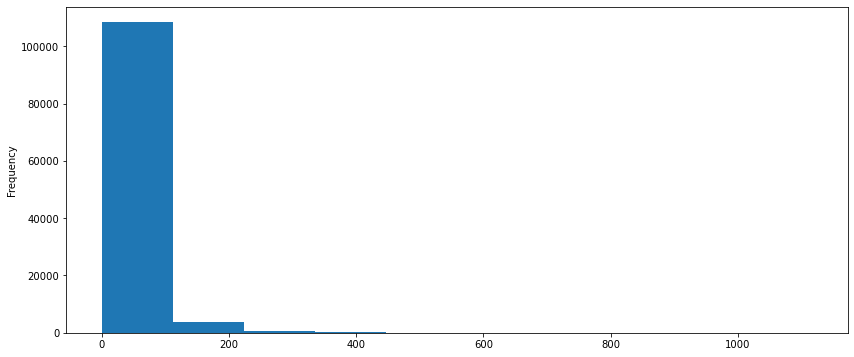

In [42]:
sales['Revenue_per_Age'].plot(kind = 'hist', figsize = (14, 6))

### Calculated Cost

In [43]:
sales['Calculated_Cost'] = sales['Order_Quantity'] * sales['Unit_Cost']
sales['Calculated_Cost'].head()

0     360
1     360
2    1035
3     900
4     180
Name: Calculated_Cost, dtype: int64

In [44]:
(sales['Calculated_Cost'] != sales['Cost']).sum()

0

<AxesSubplot:xlabel='Calculated_Cost', ylabel='Profit'>

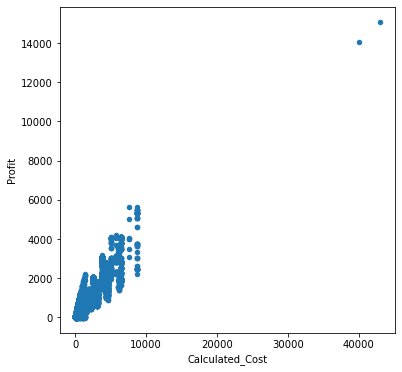

In [45]:
sales.plot(kind = 'scatter', x = 'Calculated_Cost', y = 'Profit', figsize = (6, 6))

### Calculated Revenue

In [46]:
sales['Calculated_Revenue'] = sales['Cost'] + sales['Profit']
sales['Calculated_Revenue'].head()

0     950
1     950
2    2401
3    2088
4     418
Name: Calculated_Revenue, dtype: int64

In [47]:
(sales['Calculated_Revenue'] != sales['Revenue']).sum()

0

In [48]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,49.000000,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,42.612245,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,4,45,120,238,180,418,8.893617,180,418


<AxesSubplot:ylabel='Frequency'>

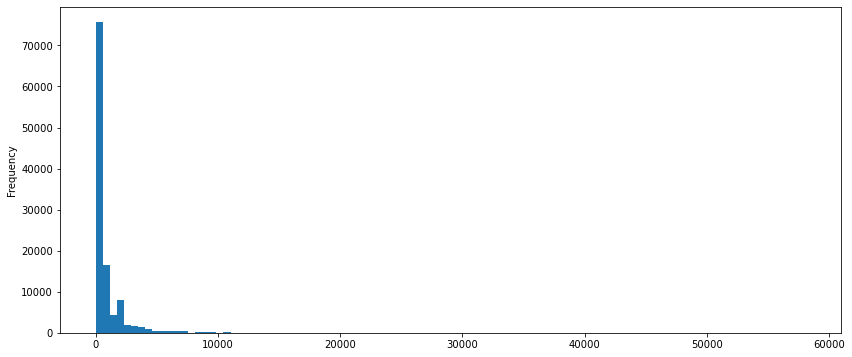

In [49]:
sales['Revenue'].plot(kind = 'hist', bins = 100 ,figsize = (14, 6))

In [50]:
sales['Unit_Price'] *= 1.03

In [51]:
sales['Unit_Price'].head()

0    123.6
1    123.6
2    123.6
3    123.6
4    123.6
Name: Unit_Price, dtype: float64

## Selection & Indexing

In [52]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,123.6,590,360,950,50.000000,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,123.6,590,360,950,50.000000,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,23,45,123.6,1366,1035,2401,49.000000,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,20,45,123.6,1188,900,2088,42.612245,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,4,45,123.6,238,180,418,8.893617,180,418


In [53]:
sales.loc[sales['State'] == 'Kentucky']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
156,2013-11-04,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700,45,108
157,2015-11-04,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700,45,108
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,12,8,22.66,142,96,238,5.950,96,238
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,14,8,22.66,165,112,277,6.925,112,277
31446,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",29,13,36.05,537,377,914,22.850,377,914
31447,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",31,13,36.05,574,403,977,24.425,403,977
79670,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,2,11,30.90,32,22,54,1.350,22,54
79671,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,21,11,30.90,336,231,567,14.175,231,567
79672,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,1,11,30.90,16,11,27,0.675,11,27
79673,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,18,11,30.90,288,198,486,12.150,198,486


In [54]:
sales.loc[sales['Age_Group'] == 'Adults (35-64)', 'Revenue'].mean()

762.8287654055604

In [55]:
sales.loc[(sales['Age_Group'] == 'Youth (<25)') | (sales['Age_Group'] == 'Adults (35-64)')].shape[0]

73652

In [56]:
sales.loc[(sales['Age_Group'] == 'Adults (35-64)') & (sales['Country'] == 'United States'), 'Revenue'].mean()

726.7260473588342

In [57]:
sales.loc[(sales['Country'] == 'France'), 'Revenue'] *= 1.1

In [58]:
sales['Revenue'].head()

0     950.0
1     950.0
2    2401.0
3    2088.0
4     418.0
Name: Revenue, dtype: float64